# Exploratory Data Analysis With Pandas || Python Machine Learning PT.1 (Nicholas_Renotte_Youtube)

# Background

## CRISP DM - Model
- Business Understanding
- Data Understanding
- Data Preparation
- Modelling
- Evaluation
- Deployment

# 1. Business Understanding 
- Basically what we are trying to built is an app that forecast money transactions according to historic data
- Likely it is a regression model because it will take old data to predict the future
- Lets imagine that the company only has 3 years of historical data but the data itself is reliable

# 2. Data Understanding

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('regression.csv')

In [3]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328


In [4]:
df.tail()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
4207,2021,Dec,CC302,2000005,Purchases,Expense,698.121
4208,2021,Dec,CC302,3000000,Cash at Bank,Asset,-282.056
4209,2021,Dec,CC302,3000001,Inventory,Asset,537.478
4210,2021,Dec,CC302,3000002,Accounts Receivable,Asset,1152.680
4211,2021,Dec,CC302,4000001,Accounts Payable,Liability,-1020.000


In [5]:
df.info() #Chequeamos que no haya ninguna entrada vacia

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4212 entries, 0 to 4211
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 4212 non-null   int64  
 1   Month                4212 non-null   object 
 2   Cost Centre          4212 non-null   object 
 3   Account              4212 non-null   int64  
 4   Account Description  4212 non-null   object 
 5   Account Type         4212 non-null   object 
 6   Amount               4212 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 230.5+ KB


In [6]:
for col in df.columns:
    print(col, len(df[col].unique()), df[col].unique())

Year 3 [2019 2020 2021]
Month 12 ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
Cost Centre 9 ['CC100' 'CC101' 'CC102' 'CC200' 'CC201' 'CC202' 'CC300' 'CC301' 'CC302']
Account 13 [1000000 1000001 1000002 1000004 2000000 2000001 2000002 2000003 2000005
 3000000 3000001 3000002 4000001]
Account Description 13 ['Product Sales' 'Licensing Revenue' 'Service Revenue' 'Fee Revenue'
 'Cost of Good Sold' 'Staff Expenses' 'Technology Expenses'
 'Property Expenses' 'Purchases' 'Cash at Bank' 'Inventory'
 'Accounts Receivable' 'Accounts Payable']
Account Type 4 ['Revenue' 'Expense' 'Asset' 'Liability']
Amount 3956 [1344.051  480.968  650.82  ... -282.056  537.478 1152.68 ]


In [7]:
df.describe()

,Year,Account,Amount
count,4212.000000,4.212000e+03,4212.000000
mean,2020.000000,2.076925e+06,476.470421
std,0.816594,9.167528e+05,477.296234
min,2019.000000,1.000000e+06,-1020.000000
25%,2019.000000,1.000004e+06,268.044500
50%,2020.000000,2.000002e+06,512.998500
75%,2021.000000,3.000000e+06,755.960250
max,2021.000000,4.000001e+06,2378.880000


In [8]:
df.describe(include=object)

,Month,Cost Centre,Account Description,Account Type
count,4212,4212,4212,4212
unique,12,9,13,4
top,Feb,CC302,Accounts Receivable,Expense
freq,351,468,324,1620


### Visualize Data

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Account Type', ylabel='Amount'>

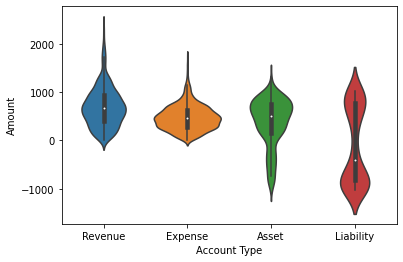

In [10]:
sns.violinplot(x='Account Type', y='Amount', data=df)

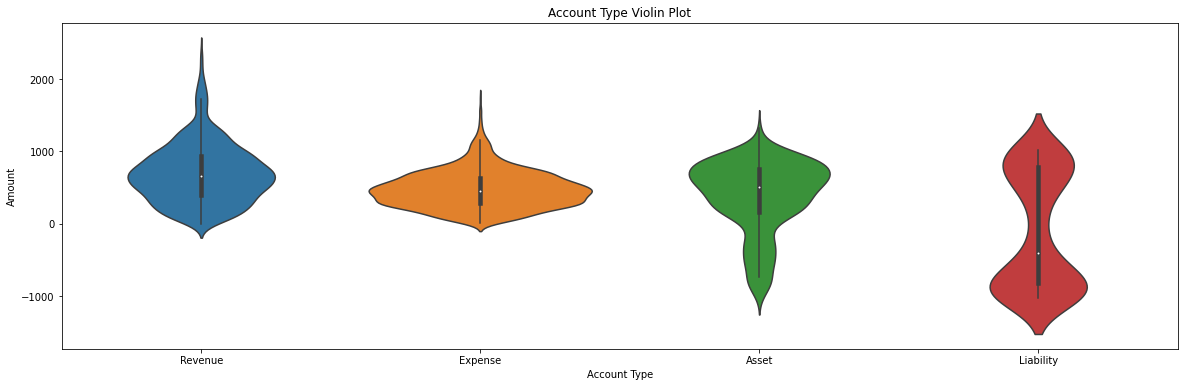

In [11]:
plt.figure(figsize=(20,6))
sns.violinplot(x='Account Type', y='Amount', data=df).set_title('Account Type Violin Plot')
plt.show()

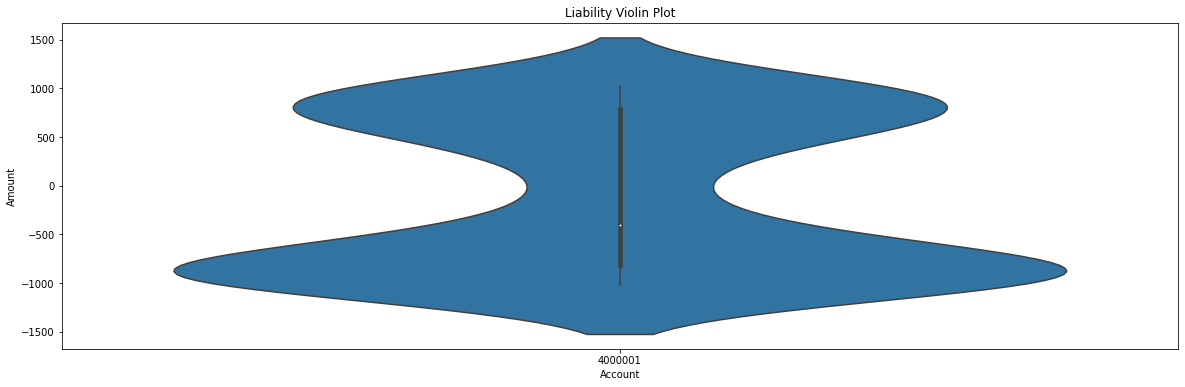

In [12]:
plt.figure(figsize=(20,6))
sns.violinplot(x='Account', y='Amount', data=df[df['Account Type']=='Liability']).set_title('Liability Violin Plot')
plt.show()

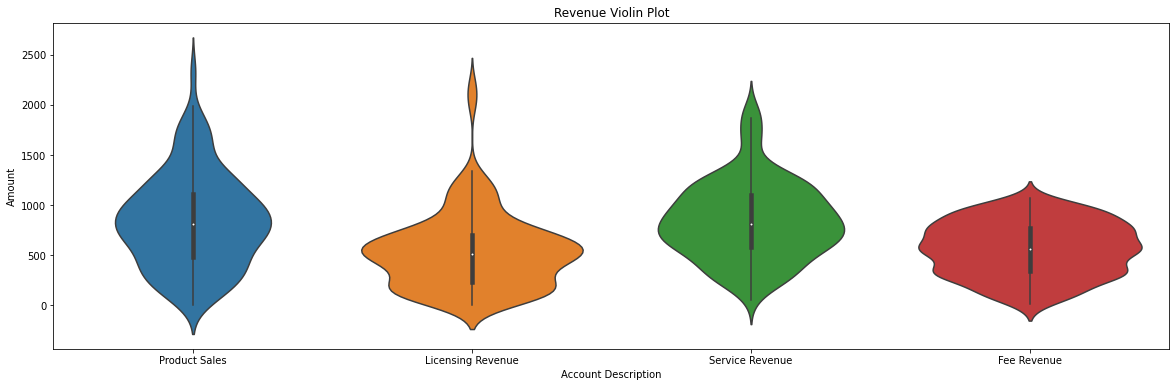

In [13]:
plt.figure(figsize=(20,6))
sns.violinplot(x='Account Description', y='Amount', data=df[df['Account Type']=='Revenue']).set_title('Revenue Violin Plot')
plt.show()

### Review Trends

In [14]:
months = {
    'Jan':1,
    'Feb':2,
    'Mar':3,
    'Apr':4,
    'May':5,
    'Jun':6,
    'Jul':7,
    'Aug':8,
    'Sep':9,
    'Oct':10,
    'Nov':11,
    'Dec':12,
}

In [15]:
df['Period'] = df['Month'].apply(lambda x:months[x])

In [16]:
df['day'] = 1

In [17]:
df['Date'] = df['Year'].astype(str) + '-' + df['Period'].astype(str) + '-' + df['day'].astype(str)

In [18]:
df['Date'] = pd.to_datetime(df['Date'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4212 entries, 0 to 4211
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year                 4212 non-null   int64         
 1   Month                4212 non-null   object        
 2   Cost Centre          4212 non-null   object        
 3   Account              4212 non-null   int64         
 4   Account Description  4212 non-null   object        
 5   Account Type         4212 non-null   object        
 6   Amount               4212 non-null   float64       
 7   Period               4212 non-null   int64         
 8   day                  4212 non-null   int64         
 9   Date                 4212 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 329.2+ KB


<AxesSubplot:xlabel='Date', ylabel='Amount'>

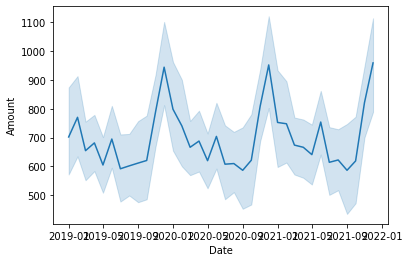

In [20]:
sns.lineplot(x='Date', y='Amount', data=df[df["Account Type"]=='Revenue'])

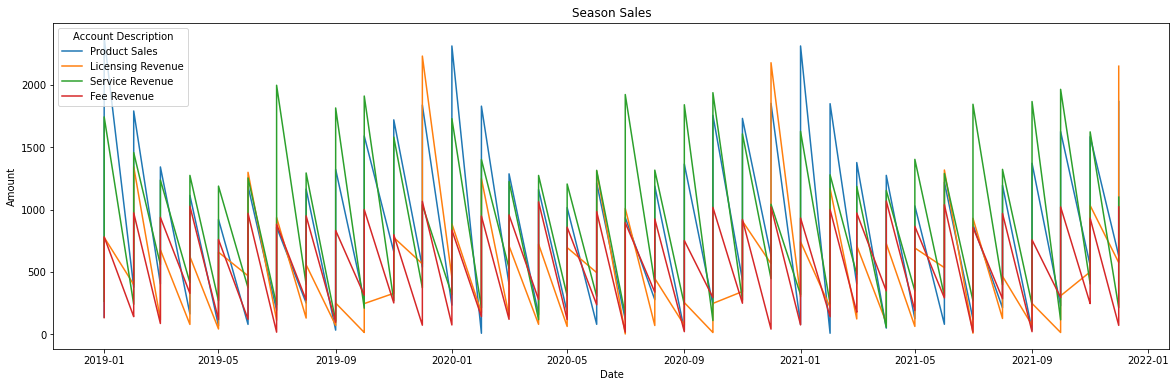

In [21]:
plt.figure(figsize=(20,6))
sns.lineplot(x='Date', y='Amount', hue='Account Description', estimator=None, data=df[df["Account Type"]=='Revenue']).set_title('Season Sales')
plt.show()

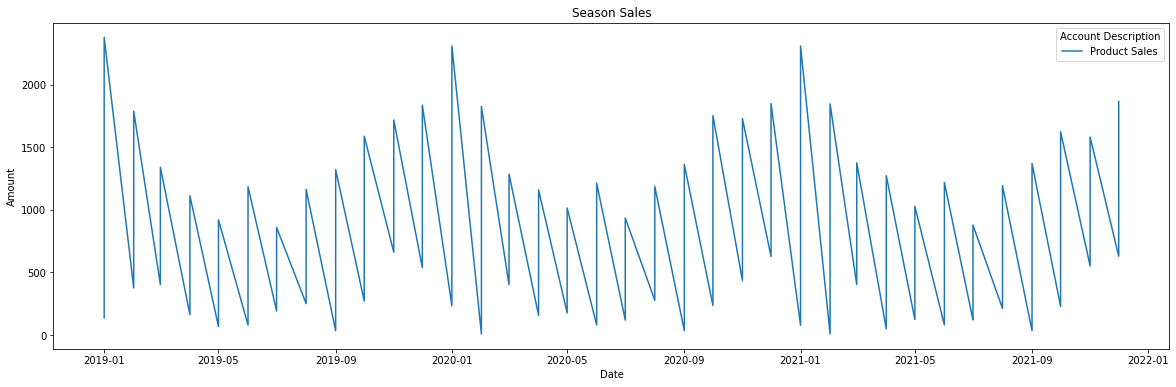

In [22]:
plt.figure(figsize=(20,6))
sns.lineplot(x='Date', y='Amount', hue='Account Description', estimator=None, data=df[df["Account Description"]=='Product Sales']).set_title('Season Sales')
plt.show()

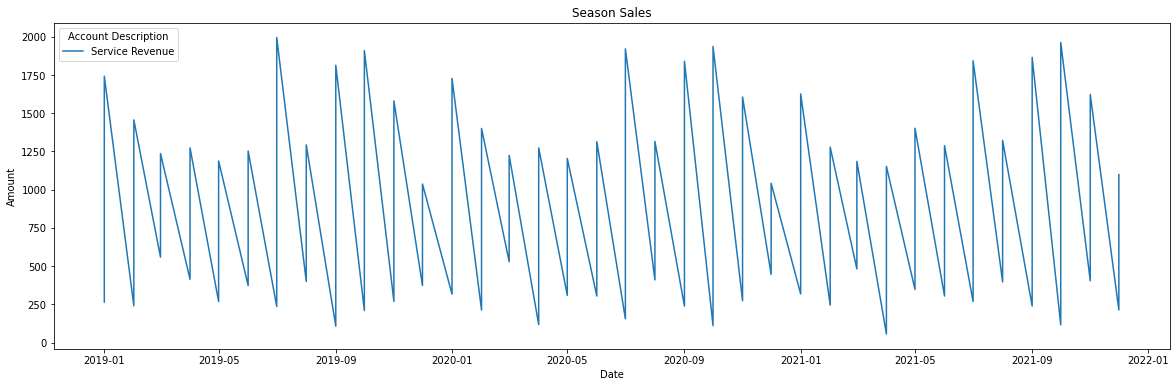

In [23]:
plt.figure(figsize=(20,6))
sns.lineplot(x='Date', y='Amount', hue='Account Description', estimator=None, data=df[df["Account Description"]=='Service Revenue']).set_title('Season Sales')
plt.show()

### Correlation

In [24]:
df.corr() #Nos muestra una matriz con el factor r (factor de correlacion de Pearson)

,Year,Account,Amount,Period,day
Year,1.000000e+00,-5.466737e-15,0.014750,-5.695624e-13,NaN
Account,-5.466737e-15,1.000000e+00,-0.417946,2.315721e-16,NaN
Amount,1.475040e-02,-4.179456e-01,1.000000,2.447256e-02,NaN
Period,-5.695624e-13,2.315721e-16,0.024473,1.000000e+00,NaN
day,NaN,NaN,NaN,NaN,NaN


#### Pero la matriz de correlacion anterior no nos vale porque nosotros lo que queremos saber es la correlacion entre los diferentes tipos de Account Descriptions que existen para Account Type = Revenue. Para calcular esto ultimo necesitaremos modificar el dataframe

In [25]:
dfRevenues = df[df['Account Type']=='Revenue'] #Creamos un dataframe que solo contenga los datos de Account Type = Revenue

In [26]:
dfRevenues.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,day,Date
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051,1,1,2019-01-01
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968,1,1,2019-01-01
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820,1,1,2019-01-01
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360,1,1,2019-01-01
13,2019,Jan,CC101,1000000,Product Sales,Revenue,1296.060,1,1,2019-01-01


In [27]:
pd.get_dummies(dfRevenues['Account Description'])

,Fee Revenue,Licensing Revenue,Product Sales,Service Revenue
0,0,0,1,0
1,0,1,0,0
2,0,0,0,1
3,1,0,0,0
13,0,0,1,0
...,...,...,...,...
4189,1,0,0,0
4199,0,0,1,0
4200,0,1,0,0
4201,0,0,0,1


In [28]:
dfRevenuesDummie = dfRevenues.join(pd.get_dummies(dfRevenues['Account Description'])) #Anexamos la matriz dummie a el dataframe

In [29]:
dfRevenuesDummie.head()
    

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,day,Date,Fee Revenue,Licensing Revenue,Product Sales,Service Revenue
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051,1,1,2019-01-01,0,0,1,0
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968,1,1,2019-01-01,0,1,0,0
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820,1,1,2019-01-01,0,0,0,1
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360,1,1,2019-01-01,1,0,0,0
13,2019,Jan,CC101,1000000,Product Sales,Revenue,1296.060,1,1,2019-01-01,0,0,1,0


In [30]:
dfRevenuesDummie['Fee Revenue'] = dfRevenuesDummie['Fee Revenue'] * dfRevenuesDummie['Amount']
dfRevenuesDummie['Licensing Revenue'] = dfRevenuesDummie['Licensing Revenue'] * dfRevenuesDummie['Amount']
dfRevenuesDummie['Product Sales'] = dfRevenuesDummie['Product Sales'] * dfRevenuesDummie['Amount']
dfRevenuesDummie['Service Revenue'] = dfRevenuesDummie['Service Revenue'] * dfRevenuesDummie['Amount']

In [31]:
dfRevenuesDummie.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,day,Date,Fee Revenue,Licensing Revenue,Product Sales,Service Revenue
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051,1,1,2019-01-01,0.00,0.000,1344.051,0.00
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968,1,1,2019-01-01,0.00,480.968,0.000,0.00
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820,1,1,2019-01-01,0.00,0.000,0.000,650.82
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360,1,1,2019-01-01,339.36,0.000,0.000,0.00
13,2019,Jan,CC101,1000000,Product Sales,Revenue,1296.060,1,1,2019-01-01,0.00,0.000,1296.060,0.00


In [32]:
dfRevenuesDummieOnly = dfRevenuesDummie.drop(['Year', 'Month', 'Cost Centre', 'Account', 'Account Description', 'Account Type', 'Amount', 'Period', 'day', 'Date'], axis=1)

In [33]:
dfRevenuesDummieOnly

,Fee Revenue,Licensing Revenue,Product Sales,Service Revenue
0,0.000,0.000,1344.051,0.000
1,0.000,480.968,0.000,0.000
2,0.000,0.000,0.000,650.820
3,339.360,0.000,0.000,0.000
13,0.000,0.000,1296.060,0.000
...,...,...,...,...
4189,366.220,0.000,0.000,0.000
4199,0.000,0.000,1227.251,0.000
4200,0.000,1236.642,0.000,0.000
4201,0.000,0.000,0.000,961.226


In [34]:
dfRevenuesDummieOnly.corr()

,Fee Revenue,Licensing Revenue,Product Sales,Service Revenue
Fee Revenue,1.000000,-0.226671,-0.246153,-0.258319
Licensing Revenue,-0.226671,1.000000,-0.218148,-0.228930
Product Sales,-0.246153,-0.218148,1.000000,-0.248606
Service Revenue,-0.258319,-0.228930,-0.248606,1.000000


<AxesSubplot:>

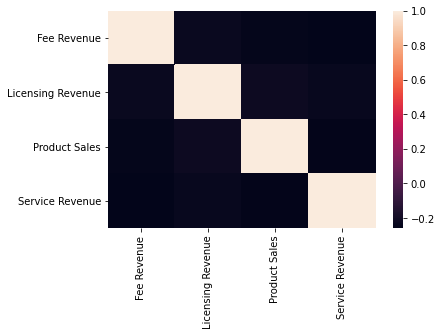

In [35]:
sns.heatmap(dfRevenuesDummieOnly.corr())

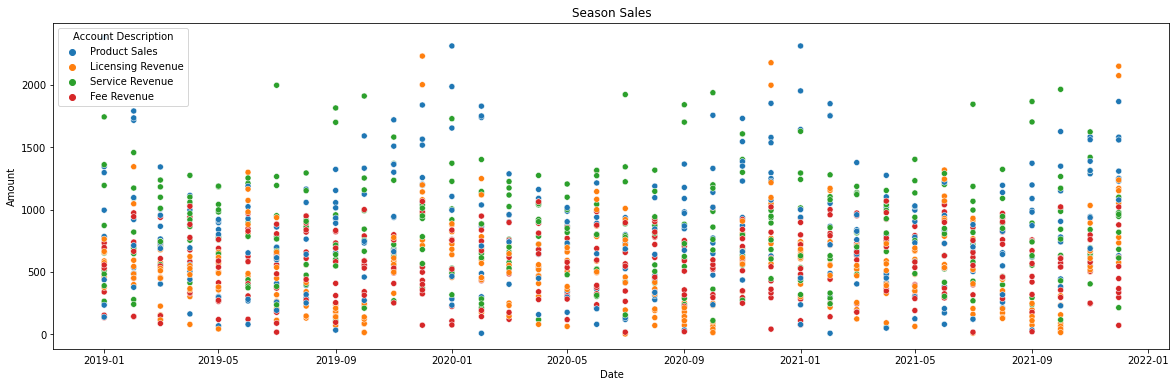

In [36]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='Date', y='Amount', hue='Account Description', estimator=None, data=df[df["Account Type"]=='Revenue']).set_title('Season Sales')
plt.show()

# 3. Data Preparation 

In [37]:
import numpy as np

In [38]:
for account in df['Account'].unique():
    print(account)

1000000
1000001
1000002
1000004
2000000
2000001
2000002
2000003
2000005
3000000
3000001
3000002
4000001


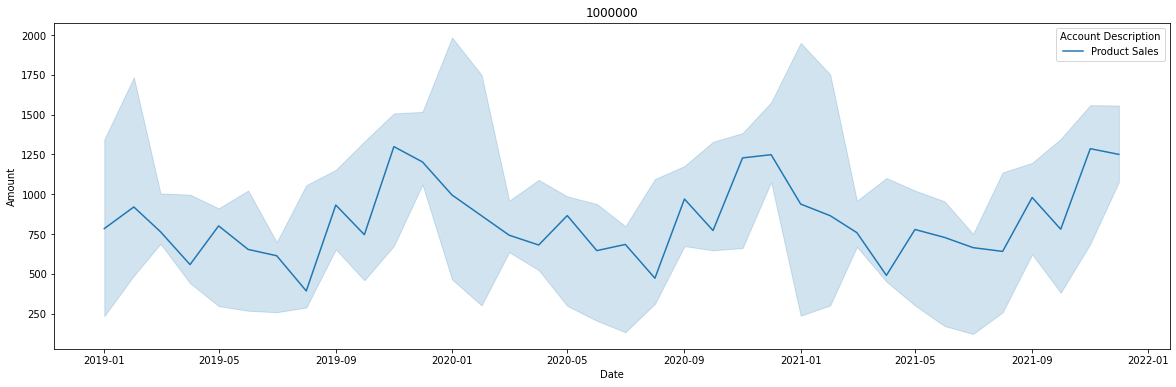

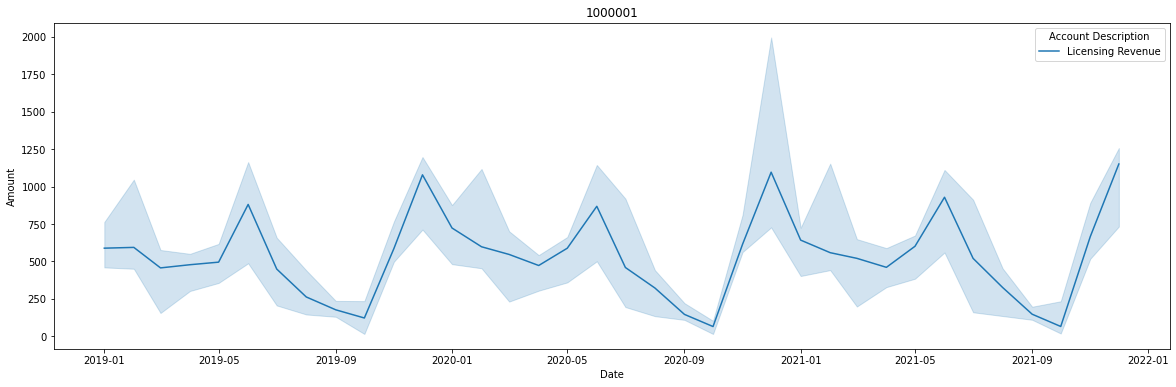

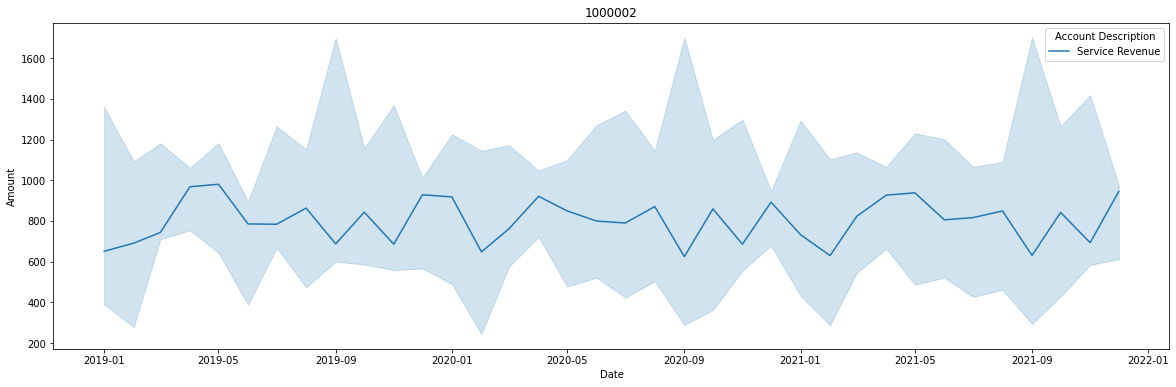

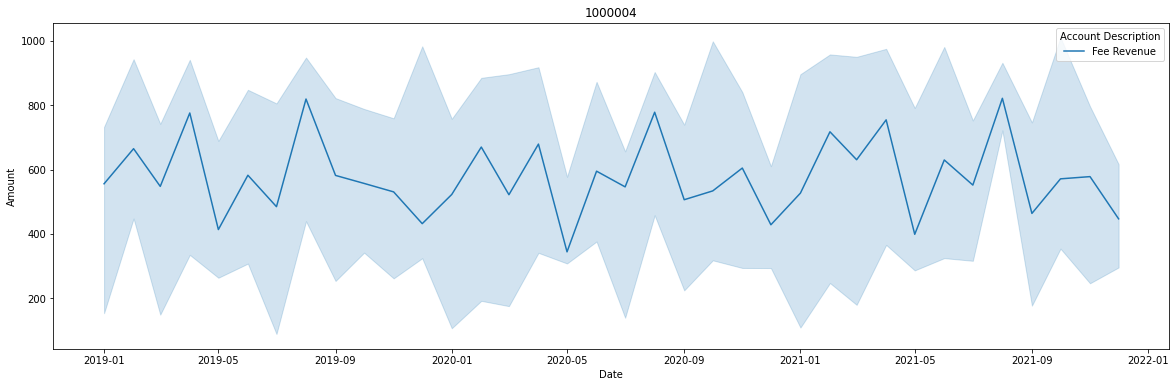

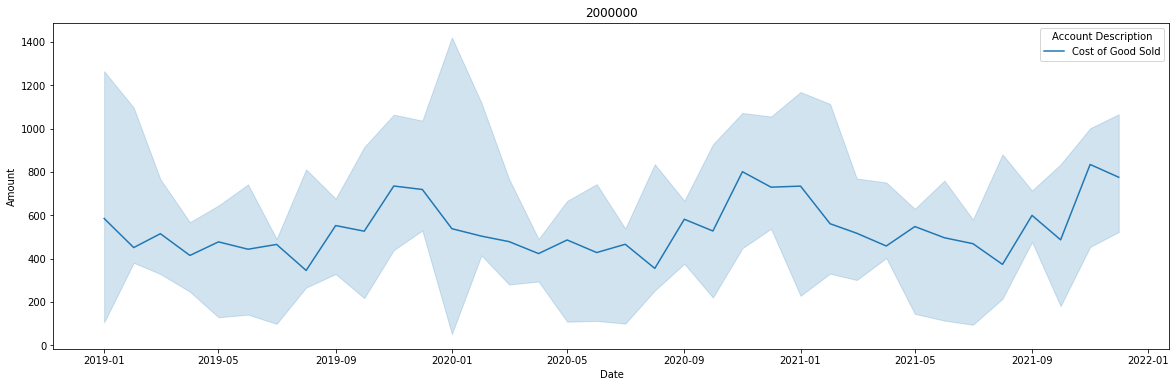

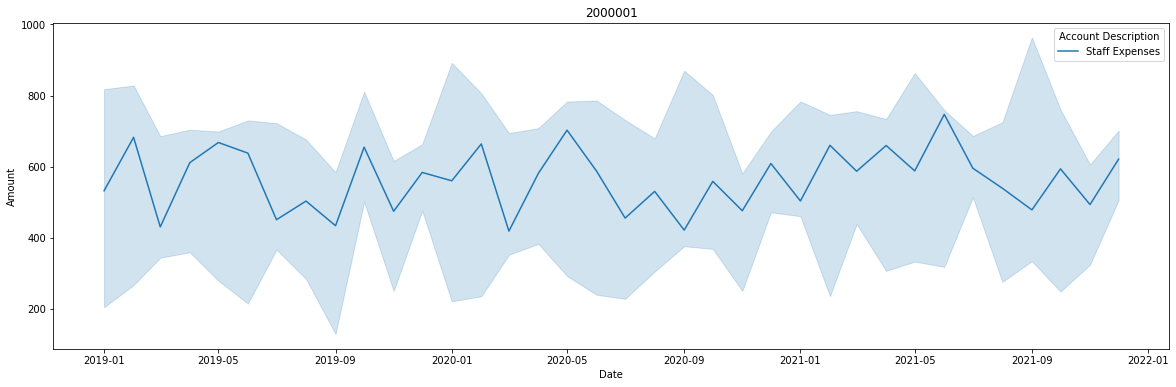

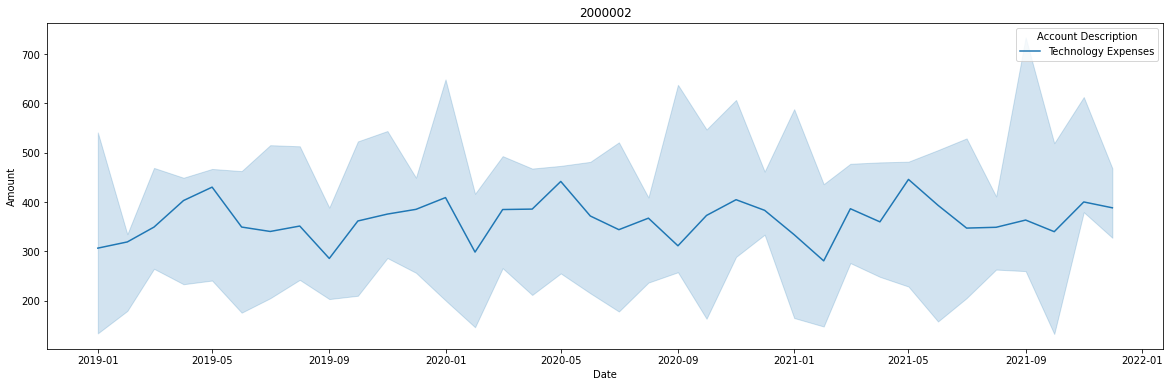

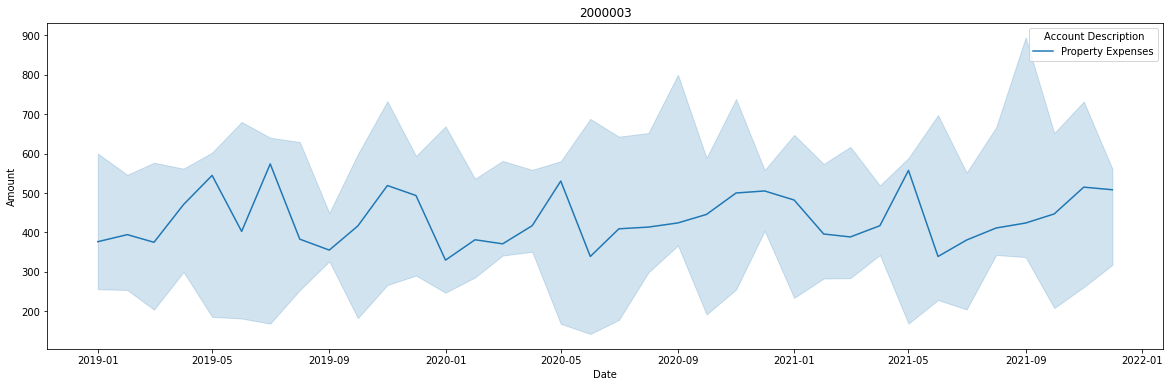

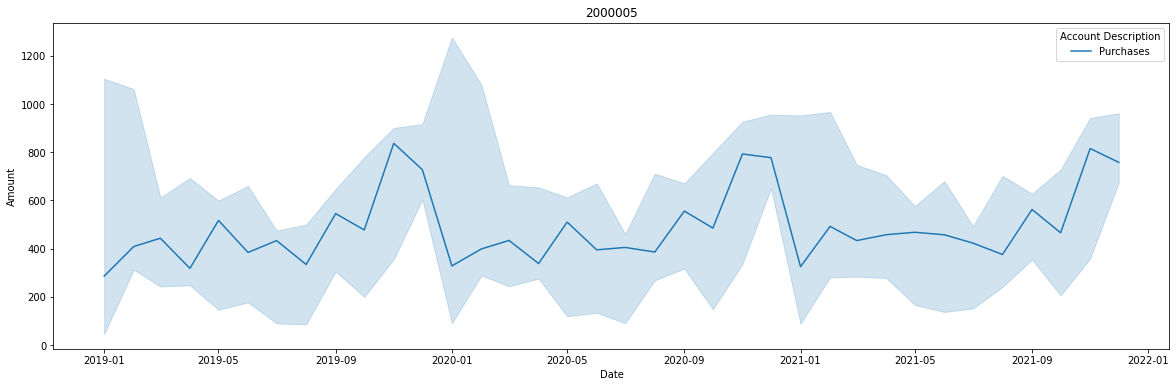

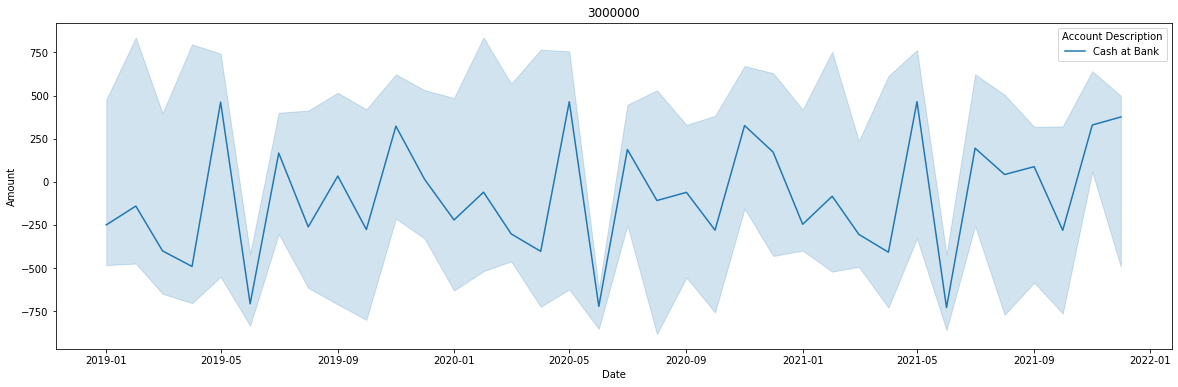

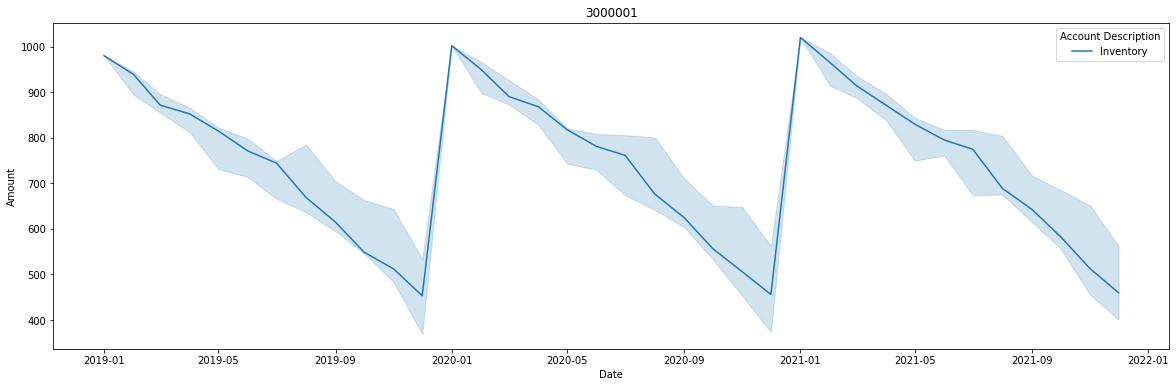

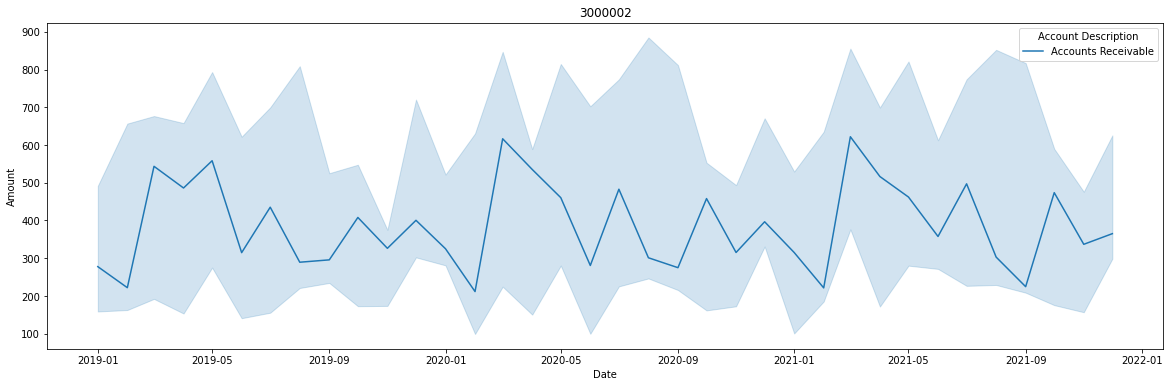

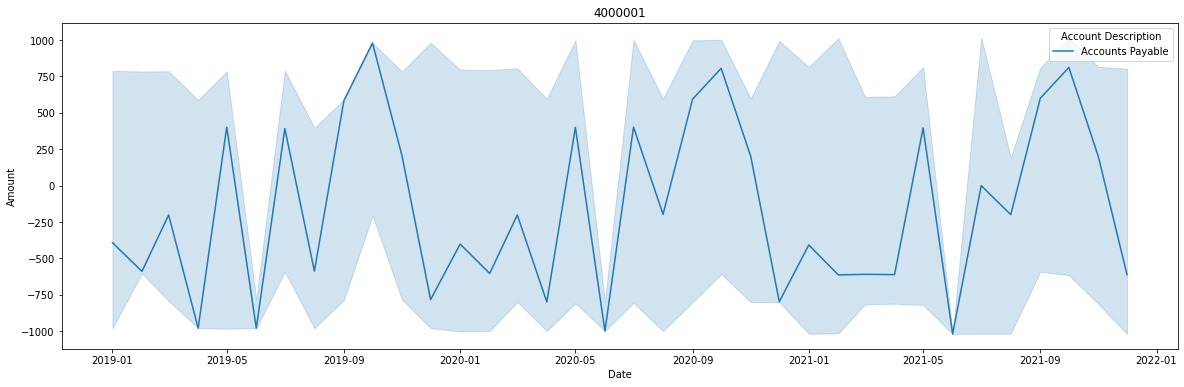

In [39]:
for account in df['Account'].unique():
    plt.figure(figsize=(20,6))
    sns.lineplot(x='Date', y='Amount', hue='Account Description', estimator=np.median, data=df[df['Account']==account]).set_title(account)
    plt.show()

#### Vemos que la cuenta 3000001 (Inventory) tiene un patron de comportamiento diferente al resto de cuentas y refleja un posible patron de estacionalidad. Por este motivo esta cuenta será eliminada del modelo. 

In [40]:
df = df[df['Account']!=3000001] #De esta forma eliminamos la cuenta 3000001 del DataFrame

In [41]:
df['Account'].unique()

array([1000000, 1000001, 1000002, 1000004, 2000000, 2000001, 2000002,
       2000003, 2000005, 3000000, 3000002, 4000001])

### Convert Fields to correct DataType

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3888 entries, 0 to 4211
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year                 3888 non-null   int64         
 1   Month                3888 non-null   object        
 2   Cost Centre          3888 non-null   object        
 3   Account              3888 non-null   int64         
 4   Account Description  3888 non-null   object        
 5   Account Type         3888 non-null   object        
 6   Amount               3888 non-null   float64       
 7   Period               3888 non-null   int64         
 8   day                  3888 non-null   int64         
 9   Date                 3888 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 334.1+ KB


In [43]:
df['Account'] = 'ACC' + df['Account'].astype(str) #Connvertimos la variable 'Account' en un string

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3888 entries, 0 to 4211
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year                 3888 non-null   int64         
 1   Month                3888 non-null   object        
 2   Cost Centre          3888 non-null   object        
 3   Account              3888 non-null   object        
 4   Account Description  3888 non-null   object        
 5   Account Type         3888 non-null   object        
 6   Amount               3888 non-null   float64       
 7   Period               3888 non-null   int64         
 8   day                  3888 non-null   int64         
 9   Date                 3888 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 334.1+ KB


In [45]:
df['Year'] = df['Year'].astype(str) #Convertimos la variable 'Year' en un string

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3888 entries, 0 to 4211
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year                 3888 non-null   object        
 1   Month                3888 non-null   object        
 2   Cost Centre          3888 non-null   object        
 3   Account              3888 non-null   object        
 4   Account Description  3888 non-null   object        
 5   Account Type         3888 non-null   object        
 6   Amount               3888 non-null   float64       
 7   Period               3888 non-null   int64         
 8   day                  3888 non-null   int64         
 9   Date                 3888 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 334.1+ KB


### Drop Analysis Fields 

In [47]:
df.drop(['Period', 'Date', 'day'], axis=1, inplace=True) #Eliminamos del DataFrame las variables que no vamos a utilizar

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3888 entries, 0 to 4211
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 3888 non-null   object 
 1   Month                3888 non-null   object 
 2   Cost Centre          3888 non-null   object 
 3   Account              3888 non-null   object 
 4   Account Description  3888 non-null   object 
 5   Account Type         3888 non-null   object 
 6   Amount               3888 non-null   float64
dtypes: float64(1), object(6)
memory usage: 243.0+ KB


In [49]:
len(df['Account'].unique())

12

In [50]:
len(df['Account Description'].unique())

12

In [51]:
df['AccountVal'] = df['Account'] + '-' + df['Account Description']

In [52]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,AccountVal
0,2019,Jan,CC100,ACC1000000,Product Sales,Revenue,1344.051,ACC1000000-Product Sales
1,2019,Jan,CC100,ACC1000001,Licensing Revenue,Revenue,480.968,ACC1000001-Licensing Revenue
2,2019,Jan,CC100,ACC1000002,Service Revenue,Revenue,650.820,ACC1000002-Service Revenue
3,2019,Jan,CC100,ACC1000004,Fee Revenue,Revenue,339.360,ACC1000004-Fee Revenue
4,2019,Jan,CC100,ACC2000000,Cost of Good Sold,Expense,1125.328,ACC2000000-Cost of Good Sold


In [53]:
len(df['AccountVal'].unique()) #De esta forma comprobamos que realmente la variable 'Account' y la variable 'Account Description' refeljan la misma informacion repetida

12

In [54]:
df.drop(['Account Description', 'AccountVal'], axis=1, inplace=True)

In [55]:
df.head()

,Year,Month,Cost Centre,Account,Account Type,Amount
0,2019,Jan,CC100,ACC1000000,Revenue,1344.051
1,2019,Jan,CC100,ACC1000001,Revenue,480.968
2,2019,Jan,CC100,ACC1000002,Revenue,650.820
3,2019,Jan,CC100,ACC1000004,Revenue,339.360
4,2019,Jan,CC100,ACC2000000,Expense,1125.328


### Ahora mismo nuestro DataFrame contiene variables categoricas, es decir, cada una tiene un significado diferente y refleja una magnitud diferente (salvo la variable 'Amount'). Este no es un formato que pueda ser tratado por los algoritmos que implementaremos más adelante durante el modelado por lo que tenemos que transformar nuestro DataFrame en uno que contenga informacion no categórica. 

In [56]:
pd.get_dummies(df) 

,Amount,Year_2019,Year_2020,Year_2021,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,...,Account_ACC2000002,Account_ACC2000003,Account_ACC2000005,Account_ACC3000000,Account_ACC3000002,Account_ACC4000001,Account Type_Asset,Account Type_Expense,Account Type_Liability,Account Type_Revenue
0,1344.051,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,480.968,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,650.820,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,339.360,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1125.328,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4206,540.060,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4207,698.121,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4208,-282.056,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4210,1152.680,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [57]:
df = pd.get_dummies(df) #Así es como convertimos nuestro dataframe en uno no categórico

In [58]:
df.head()

,Amount,Year_2019,Year_2020,Year_2021,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,...,Account_ACC2000002,Account_ACC2000003,Account_ACC2000005,Account_ACC3000000,Account_ACC3000002,Account_ACC4000001,Account Type_Asset,Account Type_Expense,Account Type_Liability,Account Type_Revenue
0,1344.051,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,480.968,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,650.820,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,339.360,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1125.328,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


# 4. Modelling

### A la hora de que crear un modelo tenemos que diferenciar entre dos tipos de variables: 1)la variable dependiente es la que vamos a intentar predecir y 2)las variables independientes que son las que utilizaremos pata entrenar el modelo de aprendizaje 

### En nuestro caso la variable dependiente sera 'Amount' y las variables independientes serán el resto 

In [59]:
X = df.drop(['Amount'], axis=1) #Variables independientes
y = df['Amount'] #Variable dependiente

In [60]:
X.columns

Index(['Year_2019', 'Year_2020', 'Year_2021', 'Month_Apr', 'Month_Aug',
       'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_Jul', 'Month_Jun',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'Cost Centre_CC100', 'Cost Centre_CC101', 'Cost Centre_CC102',
       'Cost Centre_CC200', 'Cost Centre_CC201', 'Cost Centre_CC202',
       'Cost Centre_CC300', 'Cost Centre_CC301', 'Cost Centre_CC302',
       'Account_ACC1000000', 'Account_ACC1000001', 'Account_ACC1000002',
       'Account_ACC1000004', 'Account_ACC2000000', 'Account_ACC2000001',
       'Account_ACC2000002', 'Account_ACC2000003', 'Account_ACC2000005',
       'Account_ACC3000000', 'Account_ACC3000002', 'Account_ACC4000001',
       'Account Type_Asset', 'Account Type_Expense', 'Account Type_Liability',
       'Account Type_Revenue'],
      dtype='object')

In [61]:
y.head()

0    1344.051
1     480.968
2     650.820
3     339.360
4    1125.328
Name: Amount, dtype: float64

### Ahora lo que aremos sera partir nuestro DataFrame, una parte será utilizada para el Training del modelo y la otra parte la utilizaremos para el Testing del modelo

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1234) #Hemos especificado el tamaño del test en un 30% 

In [64]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) #Vemos que 1167 es el 30% de 2721

(2721, 40) (1167, 40) (2721,) (1167,)


### Ahora lo que haremos será importar algunos algoritmos de Machine Learning que nos proporcion scikit learn 

In [66]:
from sklearn.pipeline import make_pipeline #La funcion pipeline lo que hace es generar una pipeline de Machine Learning. En la pipeline no solo se introducenn los datos de entrenamientos sino también otra funcion (StandarScaler) que lo que hace es asegurar que una variable no toma más valores que otra.

In [68]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor #Importamos 5 algortimos

### Tenemos que crear una pipeline para cada uno de los 5 algoritmos que vamos a utilizar

In [70]:
pipelines = {
    'rf': make_pipeline(RandomForestRegressor(random_state=1234)),
    'gb': make_pipeline(GradientBoostingRegressor(random_state=1234)),
    'ridge': make_pipeline(Ridge(random_state=1234)),
    'lasso': make_pipeline(Lasso(random_state=1234)),
    'enet': make_pipeline(ElasticNet(random_state=1234)),
}

### Una vez que hemos creado las pipelines lo que haremos sera ir entrenandolas una a una en un loop. Pero antes de eso tenemos que crear una parrilla de hyperparametros (los hyperparametros son parametros internos de los algoritmos). Ajustando los hyperparametros de los algoritmos obtendremos mejores resultados de nuestro modelo. Ajustar los hyperparametros de un algoritmo es como jugar con la rueda de frecuencias del radiocasete del coche, si conseguimos ponerla en la frecuencia exacta conseguiremos escuhar la emisora de forma nitida.

In [71]:
RandomForestRegressor().get_params() #Vemos los hyperparametros del algoritmo RadomForestRegressor

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### El fine tunning de los hyperparametros de los algoritmos no lo haremos de forma manual, sino que utilizaremos una funcion existente que lo hará por nosotros. Pero a esa funcion de optimizacion le tenemos que pasar previamente los hyperparametros que queremos utilizar asi com un valor raiz para cada hyperparametro. Para todo ello lo primero que vamos a hacer es crear un diccionarion con los hyperparametros que queremos optimizar de cada algoritmo y los valores semilla de los mismos

In [72]:
hypergrid = {
    'rf': {
        'randomforestregressor__min_samples_split':[2,4,6],
        'randomforestregressor__min_samples_leaf':[1,2,3]
    },
    'gb':{
        'gradientboostingregressor__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'ridge':{
        'ridge__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'lasso':{
        'lasso__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'enet':{
        'elasticnet__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    }
}

In [79]:
from sklearn.model_selection import GridSearchCV #Esta es la funcion que hara el fine tunning de los hyperparametros
from sklearn.exceptions import NotFittedError #Esta funcion lo que hace es asegurar que los modelos creados convergen de forma que si no lo hacen entonces emita un mensaje de error

In [80]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hypergrid[algo], cv=10, n_jobs=-1) #Definimos el modelo
    try:
        print('Starting training for {}.'.format(algo))
        model.fit(X_train, y_train)
        fit_models[algo] = model
        print('{} has been succesfully fit.'.format(algo))
    except NotFittedError as e:
        print(repr(e))

Starting traiining for rf.
rf has been succesfully fit.
Starting traiining for gb.
gb has been succesfully fit.
Starting traiining for ridge.
ridge has been succesfully fit.
Starting traiining for lasso.
lasso has been succesfully fit.
Starting traiining for enet.
enet has been succesfully fit.


### Ahora ya tenemos los modelos ensayados por lo que quedaría probarlos y empezar a realizar las primeras estimaciones (sobre el dataframe de test)

In [81]:
fit_models['rf'].predict(X_test)

array([ 274.21292,  503.37868,  250.26521, ..., 1032.00728, -288.41532,
       -992.34   ])

In [82]:
fit_models['gb'].predict(X_test)

array([  382.03974331,   479.9300646 ,   329.28179517, ...,
         481.07266933,  -290.68865178, -1066.62461683])

In [83]:
fit_models['ridge'].predict(X_test)

array([ 416.0213625 ,  477.94046711,  341.09806475, ...,  493.32938612,
       -229.8203679 , -485.71441706])

# 5. Evaluation

### Hemos probado varios modelos que nos han ofrecido dierentes resultasdos. ¿Pero cual de los diferentes modelos es el que ofrece mejores resultados? Esta es una cuestion que vamos a analizar en base a dos parámetros estadistícos: 1)Mean Absolute Error (La media del error absoluto) y 2)R^2 (Coeficiente de determinación, que ademas en una regresión lineal corresponde con el cuadrado del coeficiente de correlacion de Pearson)

In [84]:
from sklearn.metrics import r2_score, mean_absolute_error

In [89]:
for algo,model in fit_models.items():
    yhat = model.predict(X_test)
    print('{} scores - R2:{} MAE:{}'.format(algo, r2_score(y_test, yhat), mean_absolute_error(y_test, yhat)))

rf scores - R2:0.8197891414943025 MAE:142.11921976006852
gb scores - R2:0.48985168340175467 MAE:263.10354134137725
ridge scores - R2:0.36130322961528194 MAE:296.5759816944058
lasso scores - R2:0.3597764955615558 MAE:296.804892767996
enet scores - R2:0.3610886530527241 MAE:296.9010224274051


### Hemos visto que el modelo que mejores resultados nos ofrece (mayor R^2 y menor MAE) es el de RandomForestRegressor

In [90]:
best_model = fit_models['rf']

# 6. Deployment